## ヒートマップでやりたいこと
- 縦bit, 横chain_strength, 値valid_y_num
- 縦bit, 横chain_strength, 値broken_chain_proportion

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import QA_DwaveSampler_AutoEmbedding as qda
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import statistics
import math
%matplotlib inline

In [4]:
chain_strength_list = [5, 10, 15, 20, 25, 30, 35]
#chain_strength_dic = {20:10, 25:15, 30:20, 35:20, 40:30}

In [8]:
bit_list = [20, 25, 30, 35, 40]
num_list = [0, 1, 2, 3, 4]
n, num_reads = 1, 10000

In [13]:
#trial
broken_chain_proportion_list = []
valid_y_num_list = []
for bit in [20, 25]:
    for num in [0, 1]:
        each_broken_list = []
        each_valid_y_num_list = []
        path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(path, sep=',')
        bqm = qda.make_Hamiltonian(df)
        
        for chain_strength in [10, 15]:
            qqda = qda.QA_DSampler_AEmbedding(df, bqm, n, num_reads, chain_strength)
            valid_y_info_dic, calculation_time = qqda.find_valid_y_time_ntimes()

            if len(valid_y_info_dic) > 0:
                broken_list = [valid_y_info[1] for valid_y_info in list(valid_y_info_dic.values())]
                each_broken_list.append(statistics.mean(broken_list))
                each_valid_y_num_list.append(len(valid_y_info_dic))
        broken_chain_proportion_list.append(each_broken_list)
        valid_y_num_list.append(each_valid_y_num_list)

In [14]:
broken_chain_proportion_list

[[0.004545454545454546, 0.00019181585677749362],
 [0.002512562814070352, 0.00032679738562091506],
 [0.05142857142857143, 0.0058823529411764705],
 [0.02666666666666667, 0.0010894941634241246]]

In [15]:
valid_y_num_list

[[440, 782], [199, 153], [35, 34], [81, 257]]

In [19]:
broken_chain_proportion_list = []
valid_y_num_list = []
for bit in bit_list:
    for num in num_list:
        each_broken_list = []
        each_valid_y_num_list = []
        path = '../input/ost{}_{}.csv'.format(bit, num)
        df = pd.read_csv(path, sep=',')
        bqm = qda.make_Hamiltonian(df)
        
        for chain_strength in chain_strength_list:
            qqda = qda.QA_DSampler_AEmbedding(df, bqm, n, num_reads, chain_strength)
            valid_y_info_dic, calculation_time = qqda.find_valid_y_time_ntimes()

            if len(valid_y_info_dic) > 0:
                broken_list = [valid_y_info[1] for valid_y_info in list(valid_y_info_dic.values())]
                each_broken_list.append(statistics.mean(broken_list))
                each_valid_y_num_list.append(len(valid_y_info_dic))
            else:
                each_broken_list.append(1)
                each_valid_y_num_list.append(0)
        broken_chain_proportion_list.append(each_broken_list)
        valid_y_num_list.append(each_valid_y_num_list)
        
        print('{}_{} finished'.format(bit, num))

20_0 finished
20_1 finished
20_2 finished
20_3 finished
20_4 finished
25_0 finished
25_1 finished
25_2 finished
25_3 finished
25_4 finished
30_0 finished
30_1 finished
30_2 finished
30_3 finished
30_4 finished
35_0 finished
35_1 finished
35_2 finished
35_3 finished
35_4 finished
40_0 finished
40_1 finished
40_2 finished
40_3 finished
40_4 finished


In [20]:
broken_chain_proportion_list

[[1,
  0.002177293934681182,
  0.0006302521008403362,
  0.0004219409282700422,
  0.0007228915662650603,
  0.0005241090146750524,
  0.0007889546351084813],
 [1, 0.005555555555555556, 0.0, 0.0, 0.0, 0.0016666666666666668, 0.0],
 [1,
  0.0032967032967032967,
  0.0008223684210526316,
  0.0011976047904191617,
  0.00034722222222222224,
  0.000925925925925926,
  0.0],
 [1,
  0.005128205128205128,
  0.0011904761904761906,
  0.0,
  0.0003448275862068966,
  0.00101010101010101,
  0.0],
 [0.2, 0.002380952380952381, 0.003125, 0.0, 0.0, 0.0, 0.0],
 [1, 0.020168067226890758, 0.0014285714285714286, 0.0, 0.0, 0.0, 0.0],
 [0.36,
  0.01180327868852459,
  0.002558139534883721,
  0.0002105263157894737,
  0.0013333333333333333,
  0.0010256410256410256,
  0.0011650485436893205],
 [1,
  0.012307692307692308,
  0.0012903225806451613,
  0.0022222222222222222,
  0.0,
  0.0,
  0.0017391304347826088],
 [1, 0.0, 0.0, 0.004, 0.0, 0.0, 0.0],
 [1,
  0.015544041450777202,
  0.0021333333333333334,
  0.00301886792452830

In [21]:
valid_y_num_list

[[0, 643, 952, 474, 415, 477, 507],
 [0, 72, 74, 76, 16, 30, 36],
 [0, 364, 304, 167, 144, 108, 101],
 [0, 273, 126, 102, 145, 99, 48],
 [1, 42, 16, 20, 22, 7, 21],
 [0, 119, 56, 16, 38, 26, 19],
 [1, 122, 172, 190, 120, 195, 103],
 [0, 13, 62, 18, 8, 6, 23],
 [0, 13, 6, 10, 2, 7, 1],
 [0, 193, 150, 53, 35, 30, 43],
 [0, 4, 8, 0, 0, 10, 11],
 [0, 5, 11, 10, 7, 8, 3],
 [0, 1, 27, 77, 9, 5, 7],
 [0, 0, 12, 24, 16, 18, 2],
 [0, 30, 444, 181, 161, 94, 107],
 [0, 0, 0, 3, 3, 5, 4],
 [2, 7, 4, 170, 39, 23, 8],
 [0, 3, 3, 21, 29, 43, 12],
 [0, 0, 20, 7, 4, 8, 7],
 [0, 0, 25, 109, 22, 6, 32],
 [0, 0, 1, 10, 5, 2, 3],
 [0, 0, 20, 23, 4, 1, 1],
 [0, 0, 0, 9, 16, 17, 6],
 [0, 0, 0, 6, 3, 0, 2],
 [0, 0, 0, 2, 4, 2, 9]]

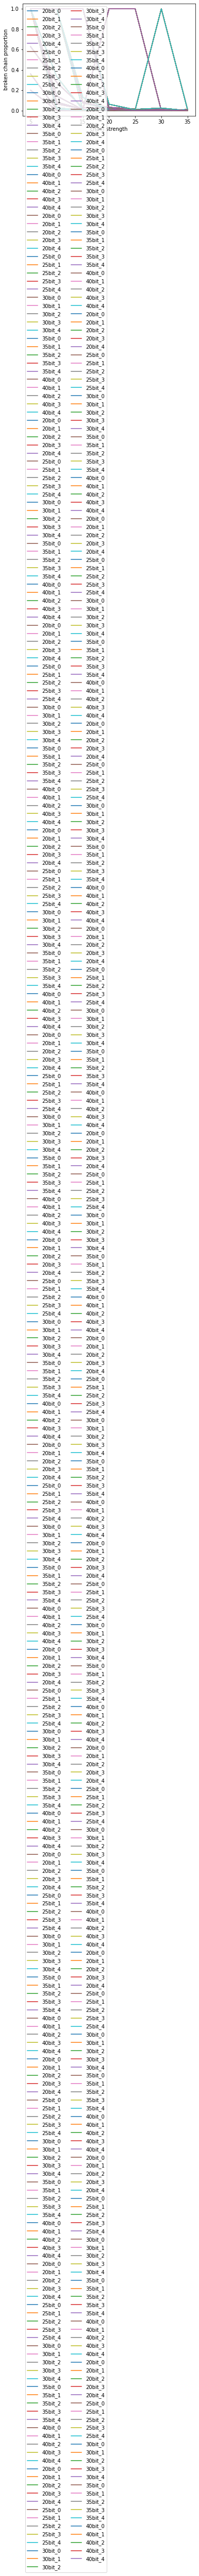

In [38]:
fig, ax = plt.subplots(1)

for each_broken_chain_proportion_list in broken_chain_proportion_list:
    for bit in bit_list:
        for num in num_list:
            i += 1
            label = '{}bit_{}'.format(bit, num)
            ax.plot(chain_strength_list, each_broken_chain_proportion_list, label=label)

#ax.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2)
ax.legend(loc='upper left', ncol=2)
ax.set_xlabel('chain strength')
ax.set_ylabel('broken chain proportion')

ax.set_xticks(chain_strength_list)
#ax.set_yscale('log')
plt.savefig('line_broken_chain_proportion.png')
#plt.show()

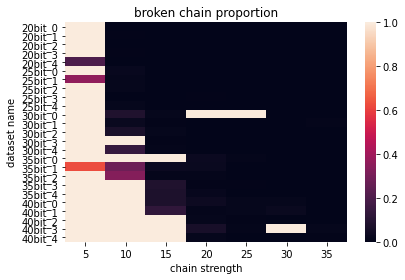

In [39]:
import seaborn as sns

names = ['{}bit_{}'.format(i, j) for i in bit_list for j in num_list]

sns.heatmap(broken_chain_proportion_list,xticklabels=chain_strength_list,yticklabels=names)

plt.xlabel('chain strength')
plt.ylabel('dataset name')
plt.title('broken chain proportion')

plt.tight_layout()
plt.savefig('broken_chain_proportion.png')
plt.show()

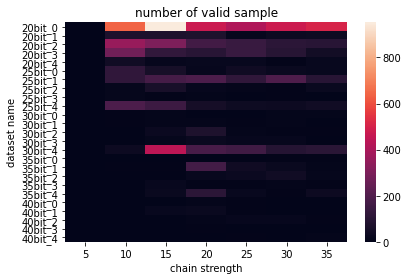

In [40]:
import seaborn as sns

names = ['{}bit_{}'.format(i, j) for i in bit_list for j in num_list]

sns.heatmap(valid_y_num_list,xticklabels=chain_strength_list,yticklabels=names)

plt.xlabel('chain strength')
plt.ylabel('dataset name')
plt.title('number of valid sample')

plt.tight_layout()
plt.savefig('chain_strength_valid_y_num')
plt.show()